# MATH 307 Assignment 1

* See [Mathematical Python](https://www.math.ubc.ca/~pwalls/math-python/) for an introduction to Python and Jupyter
* See [MATH 307 Jupyter Notebooks](https://ubcmath.github.io/MATH307/) for examples
* Write your solutions in the cells with `YOUR CODE HERE` (all other cells are ignored by the grader)
* Run the tests to verify your solutions
* There are **hidden tests** therefore your solutions may not be entirely correct even if they pass the tests below
* Submit your `.ipynb` notebook file to Canvas

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Problem 1 (2 marks)

Use the function `scipy.linalg.solve` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html)) to compute the solution $\mathbf{x}$ of the linear system $A \mathbf{x} = \mathbf{b}$ where

$$
A = \left[ \begin{array}{rrr} 1 & 5 & 2 \\ -1 & 2 & 3 \\ 6 & -2 & -1 \end{array} \right]
\hspace{10mm}
\mathbf{b} = \begin{bmatrix} 1 \\ 5 \\ 2 \end{bmatrix}
$$

In [6]:
# YOUR CODE HERE
A= np.array([[1, 5, 2], [-1,2,3],[6,-2,-1]])
b=np.array([1,5,2])
x = la.solve(A,b)

In [7]:
"Verify type and size of x. (1 mark)"
assert isinstance(x,np.ndarray) , "x should be a NumPy array."
assert x.size == 3 , "x should be a vector length 3."
print("Problem 1 Test 1: Success!")

Problem 1 Test 1: Success!


In [8]:
"Verify values of x. This cell contains hidden tests. (1 mark)"
assert np.allclose(x[0],0.44927536) , "The first entry of x should be 0.44927536."
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


## Problem 2 (7 marks)

Consider the $N \times N$ matrix

$$
A =  \left[ \begin{array}{rrrrr}
2 & -1 & & & \\
-1 & 2 & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 & -1 \\
& & & -1 & 2 \\
\end{array}
\right]
$$

In other words, $A$ is the matrix with 2 in all main diagonal entries, -1 in all upper and lower diagonal entries, and 0 everywhere else.

### Problem 2a (3 marks)

Use the function `np.diag` (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) to construct the matrix $A$ for $N = 40$.

In [31]:
# YOUR CODE HERE
N=40
mainDiag=np.full(N, 2)
otherDiag=np.full(N-1, -1)
A = np.diag(mainDiag)+np.diag(otherDiag,1)+np.diag(otherDiag,-1)

In [32]:
"Verify type of A. (1 mark)"
assert isinstance(A,np.ndarray)
print("Problem 2a Test 1: Success!")

Problem 2a Test 1: Success!


In [33]:
"Verify shape of A. (1 mark)"
assert A.shape == (40,40) , "A should be a 40 by 40 matrix."
print("Problem 2a Test 2: Success!")

Problem 2a Test 2: Success!


In [34]:
"Verify values of A. This cell contains hidden tests. (1 mark)"
assert A[0,0] == 2 , "First entry of A should be 2."
print("Problem 2a Test 3: Success!")

Problem 2a Test 3: Success!


### Problem 2b (3 marks)

Use the function `scipy.linalg.lu` (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html)) to compute the LU decomposition of $A$ for $N = 40$. The result is 3 matrices `P`, `L` and `U`. In this case, the matrix $P$ is the identity matrix and so $A = LU$.

In [35]:
# YOUR CODE HERE
P, L, U = la.lu(A) 

In [36]:
"Verify P is the identity matrix. (1 mark)"
assert np.allclose(P,np.eye(40)) , "P should be the identity matrix of size 40."
print("Problem 2b Test 1: Success!")

Problem 2b Test 1: Success!


In [37]:
"Verify size of L and U. (1 mark)"
assert L.shape == (40,40) , "L should be a 40 by 40 matrix."
assert U.shape == (40,40) , "U should be a 40 by 40 matrix."
print("Problem 2b Test 2: Success!")

Problem 2b Test 2: Success!


In [38]:
"Verify values of L and U. This cell contains hidden tests. (1 mark)"
assert L.shape == (40,40) , "L should be a 40 by 40 matrix."
assert U.shape == (40,40) , "U should be a 40 by 40 matrix."
print("Problem 2b Test 3: Success!")

Problem 2b Test 3: Success!


### Problem 2c (1 mark)

Consider the vector

$$
\mathbf{b} = \begin{bmatrix} V \\ \vdots \\ V \end{bmatrix}
$$

where $V$ is a constant. Let us solve the system $A \mathbf{x} = \mathbf{b}$ (where $A$ is the matrix from 2(a)) in 2 ways:

1. Directly using `scipy.linalg.solve`.
2. Using the LU decomposition and the function `scipy.linalg.solve_triangular`.

Run the cells below several times and observe the results:

In [39]:
V = 12
N = 40
b = V*np.ones((N,1))

In [42]:
%%timeit

# Solve system by Gaussian elimination
x = la.solve(A,b)

41.4 µs ± 487 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [43]:
%%timeit

# Solve system with forward/backward substitution given LU decompositon 
y1 = la.solve_triangular(L,b,lower=True)
x1 = la.solve_triangular(U,y1,lower=False)

27.9 µs ± 87.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**True** or **False**: Solving the system with forward/backward substitution given the LU decomposition is faster.

Enter your response as `observation2c`.

In [44]:

# YOUR CODE HERE
observation2c = True 

In [45]:
"Verify value of observation2c. This cell contains hidden tests. (1 mark)"
assert isinstance(observation2c, bool) , "observation2c should be True or False."
print("Problem 2c Test 1: Success!")

Problem 2c Test 1: Success!


## Problem 3 (4 marks)

Let $c \in \mathbb{R}$ and consider the $N \times N$ matrix

$$
A =  \left[ \begin{array}{ccccc}
c & 1 & & & \\
1 & c & 1 & & \\
& \ddots & \ddots & \ddots & \\
& & 1 & c & 1 \\
& & & 1 & c \\
\end{array}
\right]
$$

Use the function `np.diag` (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) to construct $A$. Use the function `np.linalg.cond` (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html)) to compute the condition number.

### Problem 3a (2 marks)

Compute the condition number of $A$ for $N = 25$ and $c = 7$. Save the result as `C`.

In [54]:
N=25
mainDiag=np.full(N, 7)
otherDiag=np.full(N-1, 1)
A = np.diag(mainDiag)+np.diag(otherDiag,1)+np.diag(otherDiag,-1)
C = np.linalg.cond(A)
C

1.7918576856454573

In [55]:
"Verify type of C. (1 mark)"
assert isinstance(C,np.float64)
print("Problem 3a Test 1: Success!")

Problem 3a Test 1: Success!


In [56]:
"Verify value of C. This cell contains hidden tests. (1 mark)"
assert C > 0
print("Problem 3a Test 2: Success!")

Problem 3a Test 2: Success!


### Problem 3b (2 marks)

Compute the condition number for $A$ for several different values $N$ and $c$. Observe the results and answer the following question.

**True** or **False**: For any integer $N>0$, the condition number of $A$ converges to 1 as $c \to \infty$. Enter your response `observation3b` as either **True** or **False**.

In [3]:
N=37
mainDiag=np.full(N, 10)
otherDiag=np.full(N-1, 1)
A = np.diag(mainDiag)+np.diag(otherDiag,1)+np.diag(otherDiag,-1)
C = np.linalg.cond(A)
print(C)
observation3b = True

1.4978671293378347


In [4]:
"Verify type of observation3b. (1 mark)"
assert isinstance(observation3b,bool) , "observation3b should be either True or False"
print("Problem 3b Test 1: Success!")

Problem 3b Test 1: Success!


In [5]:
"Verify value of observation3b. This cell contains hidden tests. (1 mark)"
assert isinstance(observation3b,bool) , "observation3b should be either True or False"
print("Problem 3b Test 2: Success!")

Problem 3b Test 2: Success!


## Problem 4 (2 marks)

Find the smallest integer $N$ such that the Vandermonde matrix for data points $t_0=0,\dots,t_N=N$ has condition number greater than $10^9$.

Use `np.vander` to create the Vandermonde matrix. See the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.vander.html).

Use the function `np.linalg.cond` to compute the condition number. See the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html).

In [15]:
# YOUR CODE HERE
np.arange(N)
N = 0
cond=0
while(cond<(10**9)):
    N+=1
    vandeMatrix=np.vander(np.arange(N), increasing=True)
    cond=np.linalg.cond(vandeMatrix)
N

9

In [16]:
"Verify type of N. (1 mark)"
assert isinstance(N,int) , "N should be an integer"
print("Problem 4 Test 1: Success!")

Problem 4 Test 1: Success!


In [17]:
"Verify value of N. This cell contains hidden tests. (1 mark)"
assert N > 0 , "N should be an integer"
print("Problem 4 Test 2: Success!")

Problem 4 Test 2: Success!


## Problem 5 (3 marks)

The data in the cell below records the average daily temperature in [Alert, Nunavut](https://en.wikipedia.org/wiki/Alert,_Nunavut) in April 2006 (see [Environment and Climate Change Canada](https://climate.weather.gc.ca)). Note that there are days with missing data. The goal of this exercise is to interpolate the data with a natural cubic spline and predict the temperature on the days without a measurement.

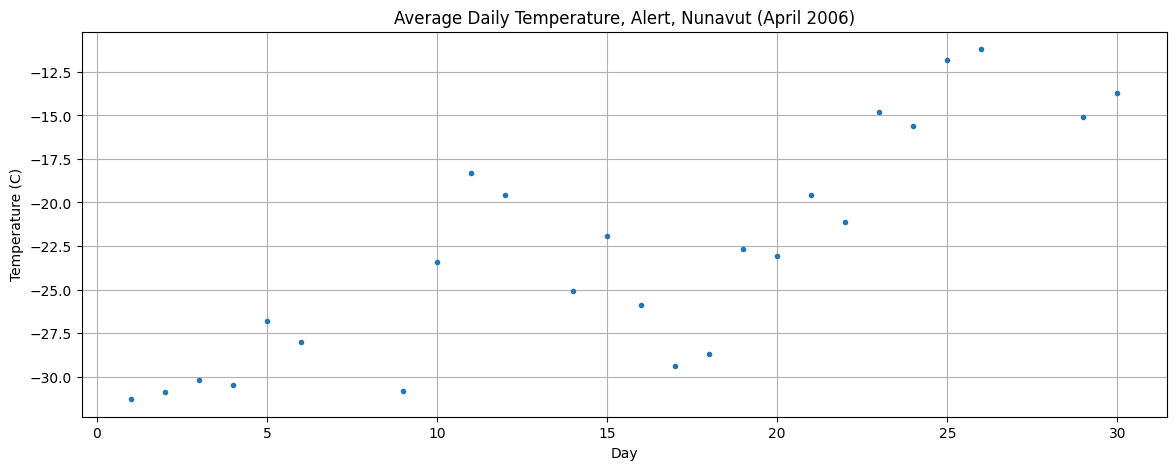

In [18]:
day = [1,2,3,4,5,6,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30]
temperature = [-31.3,-30.9,-30.2,-30.5,-26.8,-28.0,-30.8,-23.4,-18.3,-19.6,-25.1,-21.9,-25.9,-29.4,-28.7,-22.7,-23.1,-19.6,-21.1,-14.8,-15.6,-11.8,-11.2,-15.1,-13.7]

plt.figure(figsize=(14,5))
plt.plot(day,temperature,'.')
plt.title('Average Daily Temperature, Alert, Nunavut (April 2006)')
plt.xlabel('Day'), plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

### Problem 5a (2 marks)

Use the function `scipy.interpolate.CubicSpline` to compute the natural cubic spline `p` of the data. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html). Note that the natural cubic spline condition requires `bc_type='natural'`.

In [19]:
from scipy.interpolate import CubicSpline

# YOUR CODE HERE
p = CubicSpline(day, temperature)

In [20]:
"Verify type of p. (1 mark)"
assert isinstance(p,CubicSpline) , "p should be a CubicSpline object."
print("Problem 5a Test 1: Success!")

Problem 5a Test 1: Success!


In [21]:
"Verify the coefficient matrix of p. This cell contains hidden tests. (1 mark)"
assert p.c.shape == (4,24) , "Coefficient of matrix should be 4 by 24."
print("Problem 5a Test 2: Success!")

Problem 5a Test 2: Success!


Plot the cubic spline with the data.

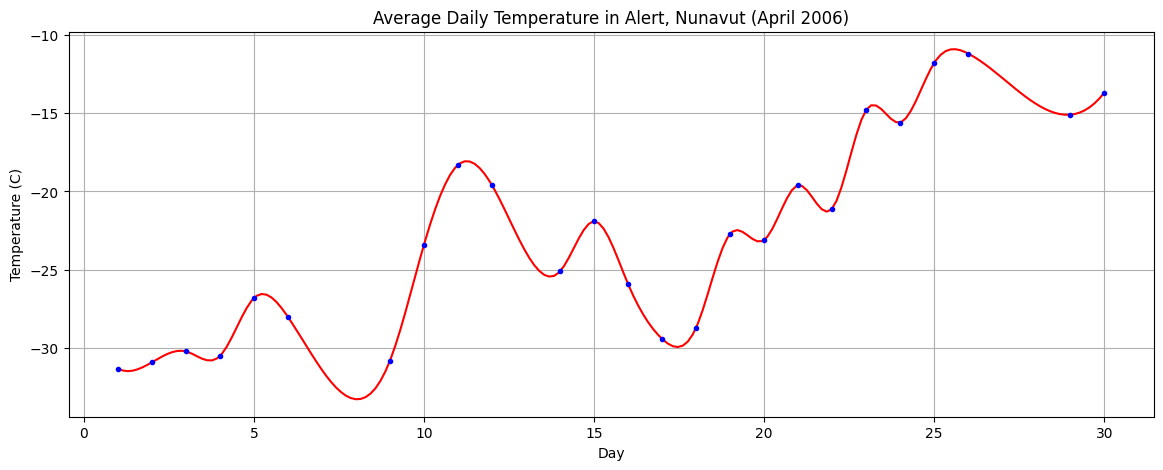

In [22]:
plt.figure(figsize=(14,5))
d = np.linspace(1,30,200)
t = p(d)
plt.plot(d,t,'r')
plt.plot(day,temperature,'.b')
plt.title('Average Daily Temperature in Alert, Nunavut (April 2006)')
plt.xlabel('Day'), plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

### Problem 5b (1 mark)

We can use the cubic spline object `p` as a function to compute the temperature at any point. Compute the temperature for `d = 8` and assign the result to `T8`.

In [26]:
# YOUR CODE HERE
T8 = p(8)

In [27]:
"Verify the value of T8. This cell contains hidden tests. (1 mark)"
assert T8 < 0 , "The temperature should be below 0."
print("Problem 5b Test 1: Success!")

Problem 5b Test 1: Success!


## Problem 6 (6 marks)

The goal of this problem is to find the unique function of the form

$$
f(t) = c_0 + c_1 \cos(\pi t) + c_2 \cos(2 \pi t) + c_3 \cos(3 \pi t) + c_4 \cos(4 \pi t) + c_5 \cos(5 \pi t)
$$

which interpolates the data

$$
(0.0,0.86198775) \ , \ (0.2,0.42221378) \ , \ (0.4,0.67085031) \ , \ (0.6,0.81337281) \ , \ (0.8,0.06133098) \ , \ (1.0,0.18599908)
$$

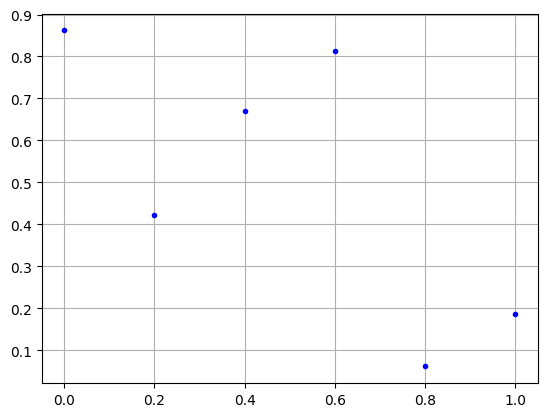

In [48]:
t = [ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0 ]
y = [ 0.86198775, 0.42221378, 0.67085031, 0.81337281, 0.06133098, 0.18599908 ]
plt.plot(t,y,'b.'), plt.grid(True)
plt.show()

### Problem 6a (3 marks)

Copy/paste/modify the code below to create the matrix $A_1$ such that the solution of $A_1 \mathbf{c} = \mathbf{y}$ is the vector $\mathbf{c}$ of coefficients (and $\mathbf{y}$ is the vector of $y$ values)

$$
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \end{bmatrix}
\hspace{1in}
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{bmatrix}
$$

```
t = np.linspace(0,1,3)
A1 = np.stack([np.ones(3),np.cos(np.pi*t),np.cos(2*np.pi*t)],axis=1)
```

In [49]:
# YOUR CODE HERE
t=np.array(t)
A1 = np.stack([np.ones(len(t)), np.cos(np.pi*t), np.cos(2*np.pi*t), np.cos(3*np.pi*t), np.cos(4*np.pi*t), np.cos(5*np.pi*t)], axis=1) 
A1

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
        -1.        ],
       [ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699,
         1.        ],
       [ 1.        , -0.30901699, -0.80901699,  0.80901699,  0.30901699,
        -1.        ],
       [ 1.        , -0.80901699,  0.30901699,  0.30901699, -0.80901699,
         1.        ],
       [ 1.        , -1.        ,  1.        , -1.        ,  1.        ,
        -1.        ]])

In [50]:
"Verify the type of A1. (1 mark)"
assert isinstance(A1,np.ndarray)
print("Problem 6a Test 1: Success!")

Problem 6a Test 1: Success!


In [51]:
"Verify the shape of A1. (1 mark)"
assert A1.shape == (6,6)
print("Problem 6a Test 2: Success!")

Problem 6a Test 2: Success!


In [52]:
"Verify values of A1. This cell contains hidden tests. (1 mark)"
assert A1[0,0] == 1.0
print("Problem 6a Test 3: Success!")

Problem 6a Test 3: Success!


### Problem 6b (3 marks)

Use `scipy.linalg.solve` to compute the solution `c`.

In [54]:
# YOUR CODE HERE
c = la.solve(A1,y)

In [55]:
"Verify the type of c. (1 mark)"
assert isinstance(c,np.ndarray)
print("Problem 6b Test 1: Success!")

Problem 6b Test 1: Success!


In [56]:
"Verify the size of c. (1 mark)"
assert c.size == 6
print("Problem 6b Test 2: Success!")

Problem 6b Test 2: Success!


In [57]:
"Verify values of c. This cell contains hidden tests. (1 mark)"
assert np.allclose(c[0],0.49835226)
print("Problem 6b Test 3: Success!")

Problem 6b Test 3: Success!


Plot the result to see how the function fits the data:

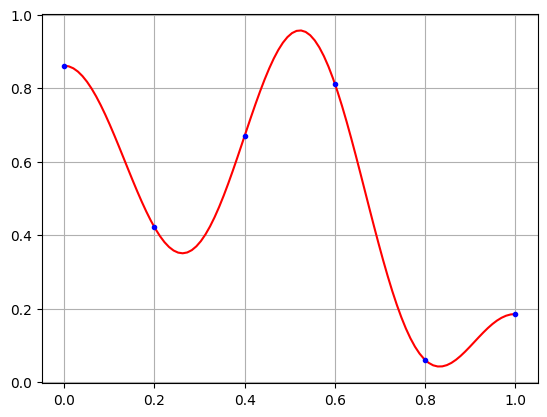

In [58]:
t = [ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0 ]
y = [ 0.86198775, 0.42221378, 0.67085031, 0.81337281, 0.06133098, 0.18599908 ]
T = np.linspace(0,1,100)
Y = sum([c[k]*np.cos(k*np.pi*T) for k in range(0,len(c))])
plt.plot(T,Y,'r',t,y,'b.'), plt.grid(True)
plt.show()

## Problem 7 (6 marks)

A [Toeplitz_matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix) has constant values along the diagonal. The function `scipy.linalg.toeplitz` creates a Toeplitz matrix from a given vector. For example:

In [42]:
M = la.toeplitz([-2,1,0,0,0,0,0])
print(M)

[[-2  1  0  0  0  0  0]
 [ 1 -2  1  0  0  0  0]
 [ 0  1 -2  1  0  0  0]
 [ 0  0  1 -2  1  0  0]
 [ 0  0  0  1 -2  1  0]
 [ 0  0  0  0  1 -2  1]
 [ 0  0  0  0  0  1 -2]]


Notes:

* Use the function `numpy.linalg.matrix_rank` to compute the rank of a matrix
* The nullspace of $M$ is denoted $N(M)$
* The range of $M$ is denoted $R(M)$

### Problem 7a (2 marks)

Compute the dimensions of $N(M_1)$ and $R(M_1)$ for the matrix $M_1$ below. Save responses as `nullspace_M1` and `range_M1` respectively.

In [39]:
M1 = la.toeplitz([1,1,0,0,0,0,1])
print(M1)

[[1 1 0 0 0 0 1]
 [1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 1 1 1]
 [1 0 0 0 0 1 1]]


In [64]:
nullspace_M1 = la.null_space(M1)
range_M1 = np.linalg.matrix_rank(M1)
print(nullspace_M1)
print(range_M1)

[]
7


In [62]:
"Verify nullspace_M1 and range_M1 are non-negative numbers. (1 mark)"
assert nullspace_M1 >= 0 and range_M1 >= 0
print("Problem 7a Test 1: Success!")

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_2824\4210968944.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  assert nullspace_M1 >= 0 and range_M1 >= 0


AssertionError: 

In [ ]:
"Verify values of nullspace_M1 and range_M1. This cell contains hidden tests. (1 mark)"
assert nullspace_M1 >= 0 and range_M1 >= 0
print("Problem 7a Test 2: Success!")

### Problem 7b (2 marks)

Compute the dimensions of $N(M_2)$ and $R(M_2)$ for the matrix $M_2$ below. Save responses as `nullspace_M2` and `range_M2` respectively.

In [ ]:
M2 = la.toeplitz([1,1,0,0,0,1,1])
print(M2)

In [ ]:
# YOUR CODE HERE
nullspace_M2 = 
range_M2 = 

In [ ]:
"Verify nullspace_M2 and range_M2 are non-negative numbers. (1 mark)"
assert nullspace_M2 >= 0 and range_M2 >= 0
print("Problem 7b Test 1: Success!")

In [ ]:
"Verify values of nullspace_M2 and range_M2. This cell contains hidden tests. (1 mark)"
assert nullspace_M2 >= 0 and range_M2 >= 0
print("Problem 7b Test 2: Success!")

### Problem 7c (2 marks)

Compute the dimensions of $N(M_3)$ and $R(M_3)$ for the matrix $M_3$ below. Save responses as `nullspace_M3` and `range_M3` respectively.

In [ ]:
M3 = la.toeplitz([1,1,1,0,0,0,0])
print(M3)

In [ ]:
# YOUR CODE HERE
nullspace_M3 = 
range_M3 = 

In [ ]:
"Verify nullspace_M3 and range_M3 are non-negative numbers. (1 mark)"
assert nullspace_M3 >= 0 and range_M3 >= 0
print("Problem 7c Test 1: Success!")

In [ ]:
"Verify values of nullspace_M3 and range_M3. This cell contains hidden tests. (1 mark)"
assert nullspace_M3 >= 0 and range_M3 >= 0
print("Problem 7c Test 2: Success!")